In [12]:
# Importing modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
matches = pd.read_csv("cleaned_data2.csv")

In [4]:
encoder = LabelEncoder()
team1 = matches['Team1']

team1_encoded = encoder.fit_transform(team1)
matches['Team1'] = team1_encoded

encoder = LabelEncoder()
team2 = matches['Team2']

team2_encoded = encoder.fit_transform(team2)
matches['Team2'] = team2_encoded
matches.head(1)

,ID,innings,BattingTeam,TotalRuns,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Team1Players,Team2Players
0,335982,1,Kolkata Knight Riders,222,16,8,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D..."


In [5]:
matches.describe()

,ID,innings,TotalRuns,Team1,Team2
count,1.928000e+03,1928.000000,1928.000000,1928.000000,1928.000000
mean,8.326089e+05,1.532676,153.577282,8.531639,8.669087
std,3.375631e+05,0.569025,35.879740,5.615517,5.487395
min,3.359820e+05,1.000000,2.000000,0.000000,0.000000
25%,5.012628e+05,1.000000,136.000000,3.000000,3.000000
50%,8.297410e+05,2.000000,157.000000,8.000000,8.000000
75%,1.178395e+06,2.000000,176.000000,13.000000,13.000000
max,1.312200e+06,6.000000,263.000000,17.000000,17.000000


In [10]:
# Use the inverse_transform() method to convert the encoded values back to text values
matches['BattingTeam'] = le.inverse_transform(cricket_data['team_encoded'])

# Print the updated data
print(cricket_data)

KeyError: 'BattingTeam'

In [7]:
# Splitting the dataset for training and testing

train_set, test_set = train_test_split(matches, test_size=0.2, random_state=42)

print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")
train_set.head()

Rows in train set: 1542
Rows in test set: 386


,ID,innings,BattingTeam,TotalRuns,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Team1Players,Team2Players
1352,1136595,1,Royal Challengers Bangalore,127,16,0,Maharashtra Cricket Association Stadium,Chennai Super Kings,field,Chennai Super Kings,"['PA Patel', 'BB McCullum', 'V Kohli', 'AB de ...","['SR Watson', 'AT Rayudu', 'SK Raina', 'DR Sho..."
141,392194,2,Delhi Daredevils,150,16,3,St George's Park,Royal Challengers Bangalore,bat,Delhi Daredevils,"['JH Kallis', 'RV Uthappa', 'KP Pietersen', 'L...","['G Gambhir', 'V Sehwag', 'TM Dilshan', 'AB de..."
2,335983,1,Chennai Super Kings,240,6,0,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh..."
1190,1082604,1,Kolkata Knight Riders,172,8,17,Eden Gardens,Sunrisers Hyderabad,field,Kolkata Knight Riders,"['SP Narine', 'G Gambhir', 'RV Uthappa', 'MK P...","['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv..."
1802,1304058,1,Lucknow Super Giants,169,9,17,"Dr DY Patil Sports Academy, Mumbai",Sunrisers Hyderabad,field,Lucknow Super Giants,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Abhishek Sharma', 'KS Williamson', 'RA Tripa..."


In [7]:
'''
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(matches, matches["innings"]):
    strat_train_set = matches.loc[train_index]
    strat_test_set = matches.loc[test_index]
strat_train_set.head()'''

'\nfrom sklearn.model_selection import StratifiedShuffleSplit\n\nsplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)\nfor train_index, test_index in split.split(matches, matches["innings"]):\n    strat_train_set = matches.loc[train_index]\n    strat_test_set = matches.loc[test_index]\nstrat_train_set.head()'

In [9]:
corr_matrix = train_set.corr()
corr_matrix["TotalRuns"].sort_values(ascending=False)

TotalRuns    1.000000
ID           0.091573
Team2       -0.019195
Team1       -0.033604
innings     -0.406520
Name: TotalRuns, dtype: float64

array([[<AxesSubplot:xlabel='TotalRuns', ylabel='TotalRuns'>,
        <AxesSubplot:xlabel='Team1', ylabel='TotalRuns'>,
        <AxesSubplot:xlabel='Team2', ylabel='TotalRuns'>,
        <AxesSubplot:xlabel='innings', ylabel='TotalRuns'>],
       [<AxesSubplot:xlabel='TotalRuns', ylabel='Team1'>,
        <AxesSubplot:xlabel='Team1', ylabel='Team1'>,
        <AxesSubplot:xlabel='Team2', ylabel='Team1'>,
        <AxesSubplot:xlabel='innings', ylabel='Team1'>],
       [<AxesSubplot:xlabel='TotalRuns', ylabel='Team2'>,
        <AxesSubplot:xlabel='Team1', ylabel='Team2'>,
        <AxesSubplot:xlabel='Team2', ylabel='Team2'>,
        <AxesSubplot:xlabel='innings', ylabel='Team2'>],
       [<AxesSubplot:xlabel='TotalRuns', ylabel='innings'>,
        <AxesSubplot:xlabel='Team1', ylabel='innings'>,
        <AxesSubplot:xlabel='Team2', ylabel='innings'>,
        <AxesSubplot:xlabel='innings', ylabel='innings'>]], dtype=object)

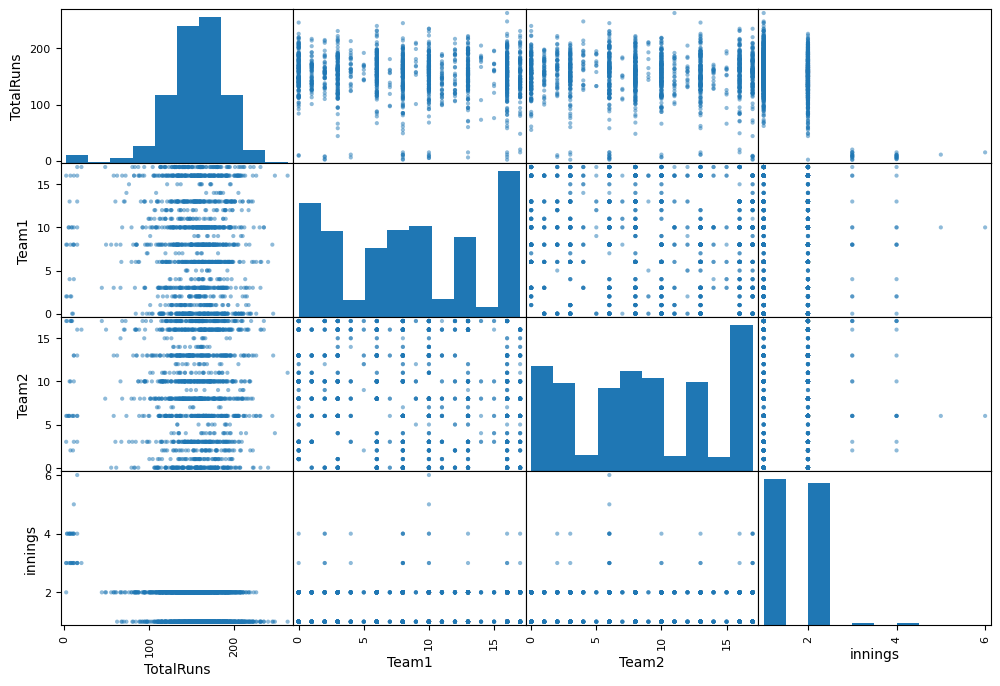

In [10]:
from pandas.plotting import scatter_matrix
attributes = ["TotalRuns", "Team1", "Team2", "innings"]
scatter_matrix(train_set[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='Team1', ylabel='TotalRuns'>

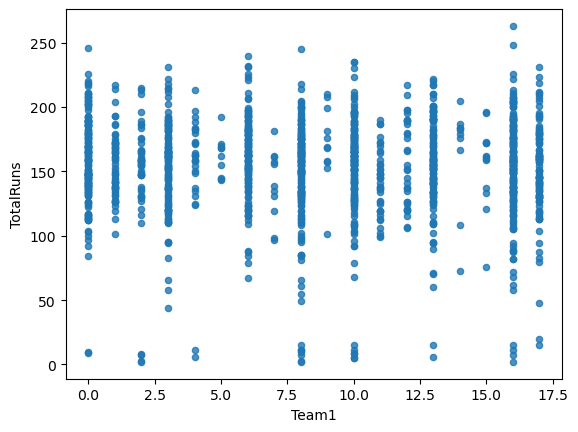

In [11]:
train_set.plot(kind = "scatter", x="Team1", y="TotalRuns", alpha=0.8)

# Training and Prediction

In [21]:
test_set.tail(2)

,ID,innings,BattingTeam,TotalRuns,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Team1Players,Team2Players
979,829759,1,Sunrisers Hyderabad,150,6,17,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,field,Sunrisers Hyderabad,"['M Vijay', 'M Vohra', 'SE Marsh', 'GJ Bailey'...","['DA Warner', 'S Dhawan', 'GH Vihari', 'MC Hen..."
978,829757,2,Royal Challengers Bangalore,99,3,16,Feroz Shah Kotla,Royal Challengers Bangalore,field,Royal Challengers Bangalore,"['MA Agarwal', 'SS Iyer', 'JP Duminy', 'Yuvraj...","['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man..."


In [22]:
from sklearn.neighbors import KNeighborsClassifier

features = train_set[['Team1', 'Team2']]
labels = train_set['TotalRuns']

# Training the classifiers
clf = KNeighborsClassifier()
clf.fit(features, labels)

preds = clf.predict([[6,17]])
print(preds)

[120]


C:\D_Drive\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\D_Drive\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
import numpy as np

#matches_X = matches[:, np.newaxis, 1]
print(matches_X)

InvalidIndexError: (slice(None, None, None), None, 1)

In [ ]:
model = linear_model.LinearRegression()

model.fit(diabetes_X_train, diabetes_Y_train)

diabetes_Y_predicted = model.predict(diabetes_X_test)

print("Mean squared error is: ", mean_squared_error(diabetes_Y_test, diabetes_Y_predicted))

In [ ]:
print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)

In [ ]:
plt.scatter(diabetes_X_test, diabetes_Y_test)
plt.plot(diabetes_X_test, diabetes_Y_predicted)
plt.show()